In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Read CSV

In [2]:
prev_df = pd.read_csv("/kaggle/input/final-audio-4ad-added-transc-embeddings/Final_audio_text_transc_embeddings_4ADadded.csv")
new_df = prev_df.drop(["Unnamed","Filename", "Transcription"], axis=1)
#print(new_df)

# Define the mapping dictionary
label_mapping = {"AD": 0, "CN": 1, "MCI": 2}
label_name=["AD","CN","MCI"]

# Get Features & Labels

In [3]:
# Separate the features and target
features = new_df.drop('Label', axis=1)
target = new_df['Label']

# Map the target labels using label_mapping
target = target.map(label_mapping)



In [4]:
# Split the dataset into a training set and a test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [5]:
import joblib

def save_load_check(classifier_used,saved_name,x_test,y_test):
    
    joblib.dump(classifier_used,saved_name)
    classifier = joblib.load(saved_name)
    pred_label=classifier.predict(x_test) 
    accuracy = accuracy_score(y_test, pred_label)
    print(f'Accuracy: {accuracy}')

# SVR

Accuracy: 0.5510204081632653
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        62
           1       0.53      0.98      0.69        55
           2       0.61      0.77      0.68        30

    accuracy                           0.55       147
   macro avg       0.55      0.60      0.49       147
weighted avg       0.53      0.55      0.45       147



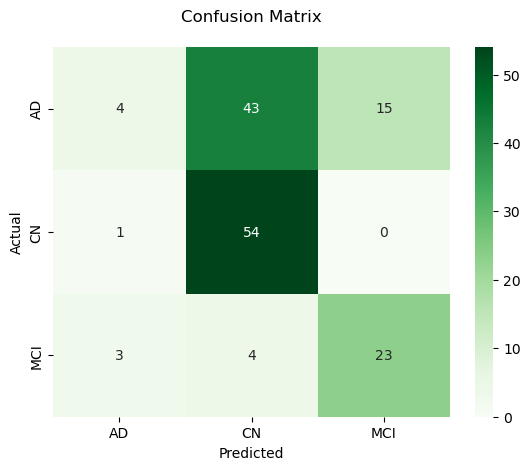

In [6]:
# Initialize the model
model_SVC = SVC(kernel = "poly")

# Train the model
model_SVC.fit(features_train, target_train)

# Make predictions on the test set
predictions_svc = model_SVC.predict(features_test)

# Calculate the accuracy score
accuracy_svc = accuracy_score(target_test, predictions_svc)

# Generate the classification report
report_svc = classification_report(target_test, predictions_svc)

print(f'Accuracy: {accuracy_svc}')
print(f'Classification Report:\n{report_svc}')



ConfusionMatrix = confusion_matrix(target_test, predictions_svc)
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [7]:
save_load_check(model_SVC,"SVC_Audios.pkl",features_test,target_test)

Accuracy: 0.5510204081632653


# Random Forest

Accuracy: 0.8027210884353742
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        62
           1       0.76      0.69      0.72        55
           2       1.00      1.00      1.00        30

    accuracy                           0.80       147
   macro avg       0.84      0.83      0.83       147
weighted avg       0.80      0.80      0.80       147



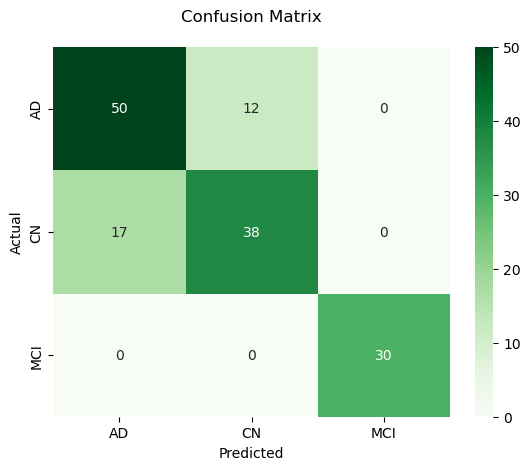

In [8]:
# Initialize the Random Forest classifier
model_RF = RandomForestClassifier()

# Train the model
model_RF.fit(features_train, target_train)

# Make predictions on the test set
predictions_RF = model_RF.predict(features_test)

# Calculate the accuracy score
accuracy_RF = accuracy_score(target_test, predictions_RF)

# Generate the classification report
report_RF = classification_report(target_test, predictions_RF)

print(f'Accuracy: {accuracy_RF}')
print(f'Classification Report:\n{report_RF}')

ConfusionMatrix = confusion_matrix(target_test, predictions_RF)
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [9]:
save_load_check(model_RF,"RF_Audios.pkl",features_test,target_test)

Accuracy: 0.8027210884353742


# XGBoost

Accuracy: 0.8299319727891157
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        62
           1       0.78      0.76      0.77        55
           2       1.00      1.00      1.00        30

    accuracy                           0.83       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.83      0.83      0.83       147



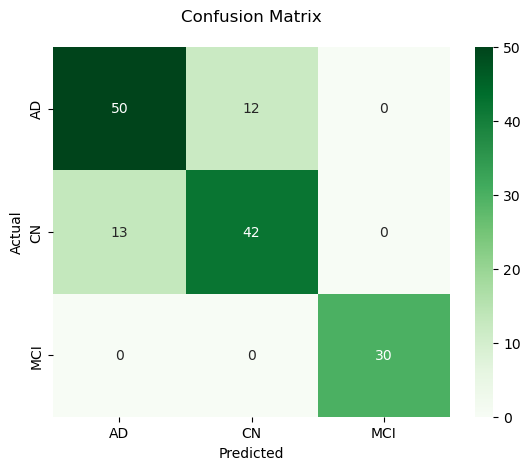

In [10]:
# Initialize the Random Forest classifier
model_XGB = xgb.XGBClassifier()

# Train the model
model_XGB.fit(features_train, target_train)

# Make predictions on the test set
predictions_XGB = model_XGB.predict(features_test)

# Calculate the accuracy score
accuracy_XGB = accuracy_score(target_test, predictions_XGB)

# Generate the classification report
report_XGB = classification_report(target_test, predictions_XGB)

print(f'Accuracy: {accuracy_XGB}')
print(f'Classification Report:\n{report_XGB}')

ConfusionMatrix = confusion_matrix(target_test, predictions_XGB)
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Confusion Matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
save_load_check(model_XGB,"XGB_Audios.pkl",features_test,target_test)

Accuracy: 0.8299319727891157
